In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install tensorflow
!pip install matplotlib
!pip install seaborn
!pip install tensorflowjs


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tensorflowjs-4.22.0-py3-none-any.whl (89 kB)
  Using cached flax-0.7.2-py3-none-any.whl (226 kB)
  Using cached jax-0.4.13.tar.gz (1.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
INFO: pip is looking at multiple versions of tensorflowjs to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflowjs-4.21.0-py3-none-any.whl (89 kB)
  Using cached tensorflowjs-4.20.0-py3-none-any.whl (89 kB)
  Using cached tensorflowjs-4.19.0-py3-none-any.whl (89 kB)
  Using cached tensorflowjs-4.18.0-py3-none-any.whl (89 kB)
  Using cached tensorflowjs-4.17.0-py3-none-any.whl (89 kB)
  Using cached tensorflowjs-4.16.0-py3-none-any.whl (89 kB)
  Using

ERROR: Cannot install flax because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

# Load the uploaded files
file_path_humanities = '../rekomendasi_perkuliahan/backend/data/score_humanities.csv'
file_path_science = '../rekomendasi_perkuliahan/backend/data/score_science.csv'
file_path_major = '../rekomendasi_perkuliahan/backend/data/majors.csv'
file_path_universitas = '../rekomendasi_perkuliahan/backend/data/universities.csv'
file_path_parsing_grade = '../rekomendasi_perkuliahan/backend/data/passing-grade.csv'

# Read the CSV files into pandas DataFrames
data_humanities = pd.read_csv(file_path_humanities)
# data_humanities = data_humanities[["id_user", "score_eko", "score_geo", "score_kmb", "score_kpu", "score_kua", "score_mat", "score_ppu", "score_sej", "score_sos"]]
data_science = pd.read_csv(file_path_science)
# data_science = data_science[["id_user", "score_bio", "score_fis", "score_kim", "score_kmb", "score_kpu", "score_kua", "score_mat", "score_ppu"]]
data_major = pd.read_csv(file_path_major)
data_major = data_major[["id_university", "type", "major_name", "capacity"]]
data_universitas = pd.read_csv(file_path_universitas)
data_parsing_grade = pd.read_csv(file_path_parsing_grade)
data_parsing_grade = data_parsing_grade[["NAMA PRODI", "RATAAN", "S.BAKU","MIN", "MAX"]]

In [8]:
for df in [data_humanities, data_science, data_major, data_universitas, data_parsing_grade]:
    df.drop(columns=[col for col in df.columns if "Unnamed" in col], inplace=True, errors="ignore")
#Penggabungan data antara major dengan universitas
data_major_univ = pd.merge(
    data_major,
    data_universitas,
    on="id_university",   # kolom penghubung
    how="inner"           # inner join (hanya yang cocok saja)
)

# Lihat hasil
print(data_major_univ.head())

   id_university     type               major_name  capacity  \
0            111  science  PENDIDIKAN DOKTER HEWAN        88   
1            111  science             TEKNIK SIPIL        64   
2            111  science             TEKNIK MESIN        48   
3            111  science             TEKNIK KIMIA        48   
4            111  science               ARSITEKTUR        48   

           university_name  
0  UNIVERSITAS SYIAH KUALA  
1  UNIVERSITAS SYIAH KUALA  
2  UNIVERSITAS SYIAH KUALA  
3  UNIVERSITAS SYIAH KUALA  
4  UNIVERSITAS SYIAH KUALA  


In [9]:
data_major_univ

,id_university,type,major_name,capacity,university_name
0,111,science,PENDIDIKAN DOKTER HEWAN,88,UNIVERSITAS SYIAH KUALA
1,111,science,TEKNIK SIPIL,64,UNIVERSITAS SYIAH KUALA
2,111,science,TEKNIK MESIN,48,UNIVERSITAS SYIAH KUALA
3,111,science,TEKNIK KIMIA,48,UNIVERSITAS SYIAH KUALA
4,111,science,ARSITEKTUR,48,UNIVERSITAS SYIAH KUALA
...,...,...,...,...,...
3162,913,humanities,DESAIN KOMUNIKASI VISUAL,10,ISBI TANAH PAPUA
3163,913,humanities,SENI RUPA MURNI,10,ISBI TANAH PAPUA
3164,913,humanities,SENI KRIYA,11,ISBI TANAH PAPUA
3165,913,humanities,SENI MUSIK,11,ISBI TANAH PAPUA


In [10]:
print(data_humanities.isnull().values.any())

False


In [14]:
#print(data_major_univ.isnull().sum())
print(data_parsing_grade.isnull().sum())

NAMA PRODI    0
RATAAN        0
S.BAKU        0
MIN           0
MAX           0
dtype: int64


In [5]:
# Select relevant columns
columns_to_keep = [col for col in combined_dataset.columns if "score" in col or "id_major" in col or "id_university" in col]
cleaned_dataset = combined_dataset[columns_to_keep]

# Debug: Check dataset shape after selecting columns
print("Dataset shape after selecting columns:", cleaned_dataset.shape)
print(cleaned_dataset.head())

# Identify score columns
score_columns = [col for col in cleaned_dataset.columns if "score" in col]

# Fill missing values with mean
cleaned_dataset[score_columns] = cleaned_dataset[score_columns].fillna(cleaned_dataset[score_columns].mean())

# Debug: Check dataset shape after filling missing values
print("Dataset shape after filling missing values:", cleaned_dataset.shape)

# Continue with normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

if not cleaned_dataset.empty:
    cleaned_dataset[score_columns] = scaler.fit_transform(cleaned_dataset[score_columns])
    print("Dataset shape after normalization:", cleaned_dataset.shape)
    print(cleaned_dataset.head())
else:
    print("The dataset is empty after cleaning. Please check earlier steps.")




Dataset shape after selecting columns: (147767, 15)
   score_eko  score_geo  score_kmb  score_kpu  score_kua  score_mat  \
0      778.0      486.0        679        594        643        686   
1      579.0      631.0        710        700        810        656   
2      600.0      481.0        314        432        522        494   
3      559.0      563.0        646        638        591        538   
4      838.0      734.0        654        613        690        315   

   score_ppu  score_sej  score_sos  id_major  id_university  \
0        559      392.0      676.0   3322014            332   
1        638      535.0      686.0   3212057            321   
2        461      467.0      574.0   3722057            372   
3        585      647.0      589.0   3212081            321   
4        628      660.0      674.0   3812106            381   

   id_university_uni  score_bio  score_fis  score_kim  
0                332        NaN        NaN        NaN  
1                321        Na

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11492\3573780016.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset[score_columns] = cleaned_dataset[score_columns].fillna(cleaned_dataset[score_columns].mean())


Dataset shape after normalization: (147767, 15)
   score_eko  score_geo  score_kmb  score_kpu  score_kua  score_mat  \
0   0.764995   0.326360   0.697889   0.582849   0.574695   0.516593   
1   0.569322   0.528591   0.738786   0.736919   0.829268   0.483407   
2   0.589971   0.319386   0.216359   0.347384   0.390244   0.304204   
3   0.549656   0.433752   0.654354   0.646802   0.495427   0.352876   
4   0.823992   0.672245   0.664908   0.610465   0.646341   0.106195   

   score_ppu  score_sej  score_sos  id_major  id_university  \
0   0.555556   0.237099   0.594301   3322014            332   
1   0.679186   0.436541   0.607870   3212057            321   
2   0.402191   0.341702   0.455902   3722057            372   
3   0.596244   0.592748   0.476255   3212081            321   
4   0.663537   0.610879   0.591588   3812106            381   

   id_university_uni  score_bio  score_fis  score_kim  
0                332   0.386941   0.351266   0.399034  
1                321   0.386941   

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11492\3573780016.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset[score_columns] = scaler.fit_transform(cleaned_dataset[score_columns])


In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Separate features (X) and labels (Y)
X = cleaned_dataset[score_columns].values  # Features: normalized scores
Y = cleaned_dataset["id_major"].values    # Labels: target major IDs

# Debug: Check the shape of features and labels
print("Features (X) shape:", X.shape)
print("Labels (Y) shape:", Y.shape)

# Step 2: Split dataset into training and testing sets (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Debug: Check the shapes of training and testing datasets
print("Training set shape:", X_train.shape, Y_train.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

# Step 3: Reshape X for CNN (if required)
# Assuming 1 channel for simplicity
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Debug: Check reshaped data
print("Training set (CNN-ready) shape:", X_train_cnn.shape)
print("Testing set (CNN-ready) shape:", X_test_cnn.shape)



Features (X) shape: (147767, 12)
Labels (Y) shape: (147767,)
Training set shape: (118213, 12) (118213,)
Testing set shape: (29554, 12) (29554,)
Training set (CNN-ready) shape: (118213, 12, 1)
Testing set (CNN-ready) shape: (29554, 12, 1)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the labels (id_major)
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Debug: Check the encoded labels
print("Encoded labels:", Y_encoded[:10])  # Check first 10 labels

# Step 2: Split dataset into training and testing sets (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Step 3: Reshape X for CNN (if required)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 4: Update the model output layer
model = models.Sequential([
    layers.Input(shape=(X_train_cnn.shape[1], 1)),  # Input layer
    layers.Conv1D(32, kernel_size=3, activation='relu'),  # Convolutional layer
    layers.MaxPooling1D(pool_size=2),  # Pooling layer
    layers.Conv1D(64, kernel_size=3, activation='relu'),  # Another Conv layer
    layers.MaxPooling1D(pool_size=2),  # Another Pooling layer
    layers.Flatten(),  # Flatten to 1D
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(len(np.unique(Y_encoded)), activation='softmax')  # Output layer with softmax
])

# Step 5: Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(
    X_train_cnn, Y_train, 
    validation_data=(X_test_cnn, Y_test), 
    epochs=20, 
    batch_size=32
)

# Step 7: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_cnn, Y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")



Encoded labels: [ 948  782 1733  785 1859  415  876 1539  824 1037]
Epoch 1/20
3695/3695 ━━━━━━━━━━━━━━━━━━━━ 73s 19ms/step - accuracy: 0.0043 - loss: 7.3807 - val_accuracy: 0.0088 - val_loss: 6.9777
Epoch 2/20
3695/3695 ━━━━━━━━━━━━━━━━━━━━ 70s 19ms/step - accuracy: 0.0093 - loss: 6.8332 - val_accuracy: 0.0109 - val_loss: 6.6600
Epoch 3/20
3695/3695 ━━━━━━━━━━━━━━━━━━━━ 72s 20ms/step - accuracy: 0.0101 - loss: 6.6086 - val_accuracy: 0.0106 - val_loss: 6.6126
Epoch 4/20
3695/3695 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - accuracy: 0.0101 - loss: 6.5466 - val_accuracy: 0.0108 - val_loss: 6.5886
Epoch 5/20
3695/3695 ━━━━━━━━━━━━━━━━━━━━ 72s 19ms/step - accuracy: 0.0110 - loss: 6.5074 - val_accuracy: 0.0107 - val_loss: 6.5803
Epoch 6/20
3695/3695 ━━━━━━━━━━━━━━━━━━━━ 71s 19ms/step - accuracy: 0.0114 - loss: 6.4763 - val_accuracy: 0.0107 - val_loss: 6.6056
Epoch 7/20
3695/3695 ━━━━━━━━━━━━━━━━━━━━ 77s 21ms/step - accuracy: 0.0110 - loss: 6.4551 - val_accuracy: 0.0110 - val_loss: 6.5864
Epoch 8/

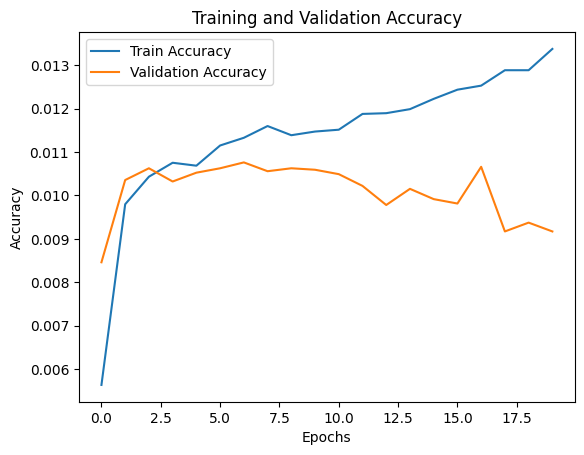

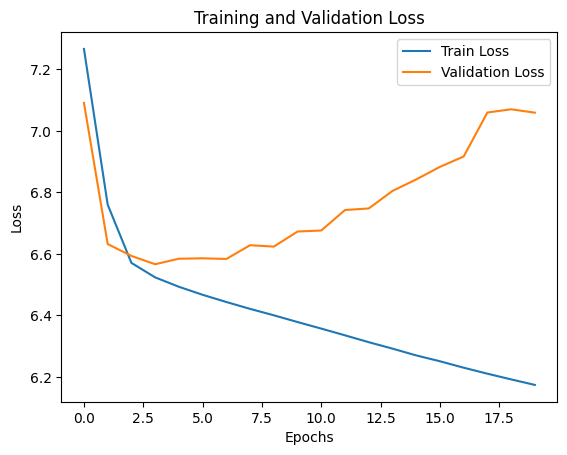

In [8]:
import matplotlib.pyplot as plt

# Step 1: Visualisasi hasil pelatihan
def plot_training_history(history):
    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Call the plot function to visualize the results
plot_training_history(history)


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 1: Define user profile (based on average scores)
def generate_user_profile(data, user_scores_columns):
    # Assuming user scores are provided as a dictionary or extracted from the dataset
    user_scores = data[user_scores_columns].mean(axis=0).values.reshape(1, -1)
    return user_scores

# Generate a mock user profile (for example purposes)
user_profile = generate_user_profile(cleaned_dataset, score_columns)

# Step 2: Calculate similarity between user profile and items
item_features = cleaned_dataset[score_columns].values
similarities = cosine_similarity(user_profile, item_features).flatten()

# Step 3: Attach similarity scores to the dataset
cleaned_dataset['similarity'] = similarities

# Step 4: Sort items based on similarity and select top recommendations
top_recommendations = cleaned_dataset.sort_values('similarity', ascending=False).head(10)
print("Top Recommendations Based on Similarity:")
print(top_recommendations[['id_major', 'id_university', 'similarity']])

# Step 5: Integrate with deep learning predictions
# Optionally, filter or adjust weights in your predictions based on the similarity score
# Example: Reweighting probabilities from the CNN model using similarity
cbf_weights = cleaned_dataset['similarity'] / cleaned_dataset['similarity'].sum()
predicted_probabilities = model.predict(X_test_cnn)
adjusted_probabilities = predicted_probabilities * cbf_weights.values[:len(predicted_probabilities)].reshape(-1, 1)

# Step 6: Output final recommendations
final_recommendations = np.argmax(adjusted_probabilities, axis=1)
final_recommendation_ids = label_encoder.inverse_transform(final_recommendations)

print("Final Recommendations for Each Test Sample:")
for i, recommendation in enumerate(final_recommendation_ids[:10]):  # Show first 10 recommendations
    print(f"Test Sample {i + 1}: Recommended Major ID: {recommendation}")


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11492\2856687844.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataset['similarity'] = similarities


Top Recommendations Based on Similarity:
        id_major  id_university  similarity
44966    3212154            321    0.999742
136394   3731161            373    0.999729
17567    3532316            353    0.999676
56873    3722081            372    0.999635
145703   3411041            341    0.999622
96396    3331102            333    0.999593
70798    3731203            373    0.999576
103515   3731161            373    0.999557
122149   3211294            321    0.999557
77927    3561076            356    0.999523
924/924 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step
Final Recommendations for Each Test Sample:
Test Sample 1: Recommended Major ID: 3511123
Test Sample 2: Recommended Major ID: 3552054
Test Sample 3: Recommended Major ID: 3242041
Test Sample 4: Recommended Major ID: 3551012
Test Sample 5: Recommended Major ID: 3531077
Test Sample 6: Recommended Major ID: 3721263
Test Sample 7: Recommended Major ID: 3721286
Test Sample 8: Recommended Major ID: 3552054
Test Sample 9: Recommended Maj

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get predictions on the test set
Y_pred = model.predict(X_test_cnn)
Y_pred = np.argmax(Y_pred, axis=1)  # Convert softmax outputs to predicted class

# Step 2: Get unique labels from Y_test and Y_pred
labels = np.unique(np.concatenate([Y_test, Y_pred]))

# Step 3: Classification report with correct labels
print("Classification Report:")
print(classification_report(Y_test, Y_pred, labels=labels))

# Step 4: Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred, labels=labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


NameError: name 'model' is not defined

In [2]:
# Save the model in TensorFlow.js format
import tensorflowjs as tfjs

# Save the model to a directory
tfjs.converters.save_keras_model(model, 'model_tfjs/')


ModuleNotFoundError: No module named 'tensorflowjs'